Question 3

In [21]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


### Load and normalize our data

In [22]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


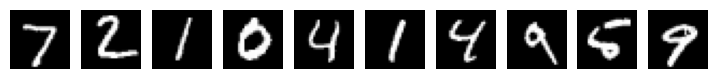

In [23]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

Loading Pretrained data

In [24]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

313/313 [==============================] - 1s 2ms/step


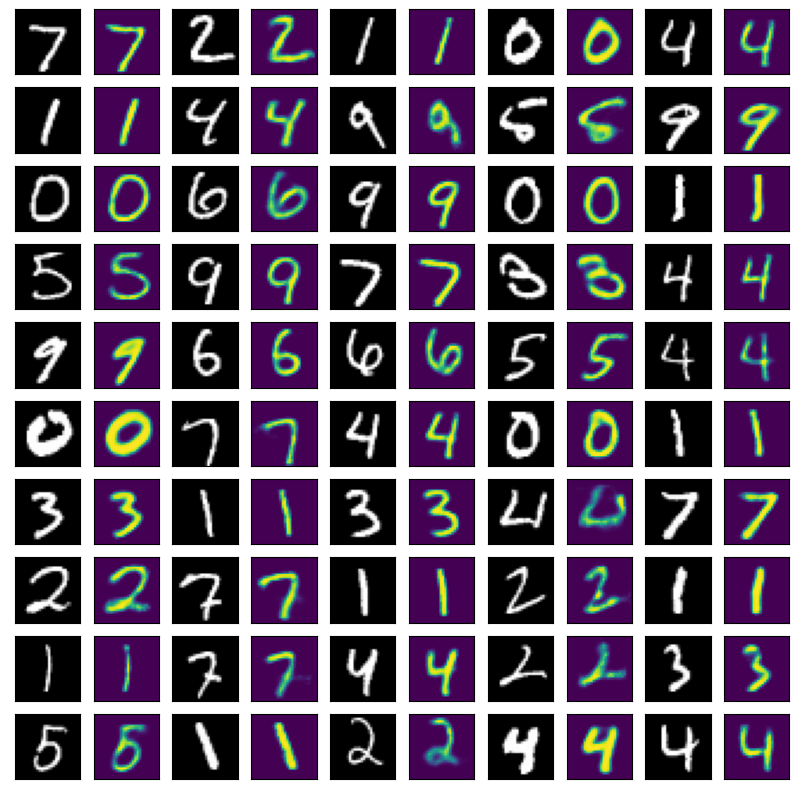

In [25]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

Data Load

In [26]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

ad1= tf.keras.utils.load_img("C:/Users/davul/Downloads/ISM6251-DSP/data/ad1.png", target_size=(28, 28), color_mode = "grayscale")
ad2= tf.keras.utils.load_img("C:/Users/davul/Downloads/ISM6251-DSP/data/ad2.png", target_size=(28, 28), color_mode = "grayscale")
ad3= tf.keras.utils.load_img("C:/Users/davul/Downloads/ISM6251-DSP/data/ad3.png", target_size=(28, 28), color_mode = "grayscale")
ad4= tf.keras.utils.load_img("C:/Users/davul/Downloads/ISM6251-DSP/data/ad4.png", target_size=(28, 28), color_mode = "grayscale")
ad5= tf.keras.utils.load_img("C:/Users/davul/Downloads/ISM6251-DSP/data/ad5.png", target_size=(28, 28), color_mode = "grayscale")

In [27]:
new_images=np.vstack([ad1,ad2,ad3,ad4,ad5])
train_ad = new_images.reshape(-1, 784)
test_ad = new_images.reshape(-1, 784)
train_ad = train_ad.astype('float32')/255
test_ad = test_ad.astype('float32')/255


Oversampling

In [28]:
train_ad= np.repeat(train_ad[:],30,axis=0)

In [29]:
train_ad.shape

(150, 784)

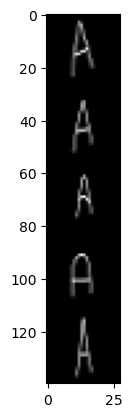

In [30]:
plt.imshow(new_images, cmap="gray")
ax.axis('off')

plt.show()

Create an autoencoder model

In [31]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 784)               79184     
                                                                 
 dense_20 (Dense)            (None, 100)               78500     
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)              

Train the autoencoder model

In [32]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


In [33]:
new_image_set= train_images[:20000]
for i in range(len(train_ad)):
    input_arr = train_ad[i]
    input_arr = input_arr.reshape(784)

    np.random.shuffle(train_ad)

    bad_images = np.repeat(input_arr.reshape(-1,1,28,28),135,axis=1).reshape(-1,784)
    new_image_set = np.concatenate((new_image_set, bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [42]:
# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
x=train_images, # For autoencoders, both the input and the target are the same
y=train_images, 
epochs=10, 
batch_size=128,
shuffle=True, 
validation_data=(new_images_test,new_images_test),
callbacks=[early_stop]
)

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0735 - val_loss: 0.0661
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0733 - val_loss: 0.0670
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0731 - val_loss: 0.0674
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0730 - val_loss: 0.0668
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0729 - val_loss: 0.0664
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0727 - val_loss: 0.0668
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0725 - val_loss: 0.0673
Epoch 8/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0725 - val_loss: 0.0674
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0723 - val_loss: 0.0655
Epoch 10/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0722 - val_lo

313/313 [==============================] - 1s 3ms/step


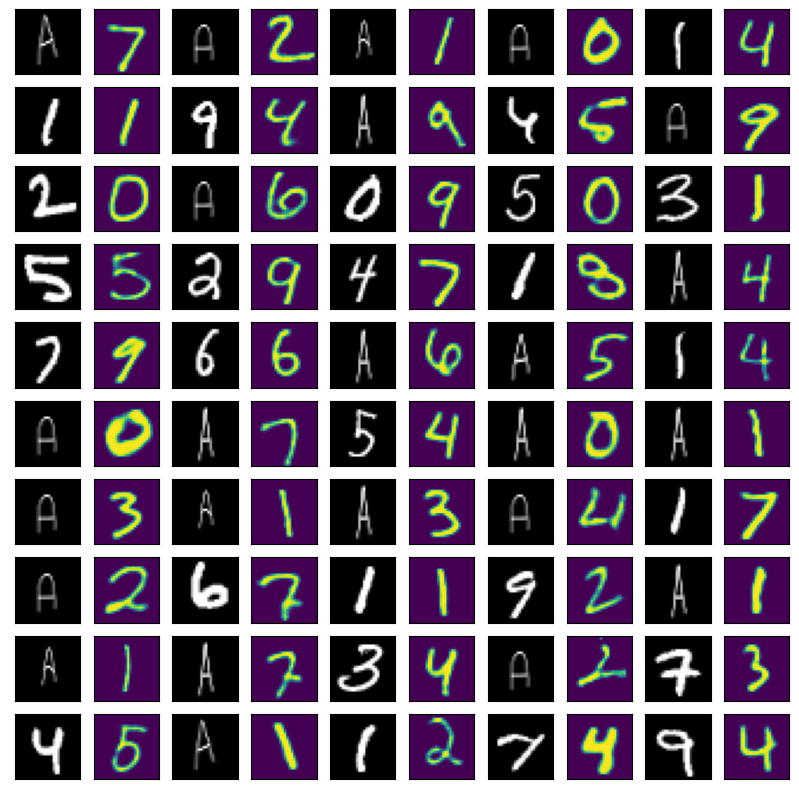

In [43]:
#test the autoencoder with MNIST data
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

Looking at the results i can say that only few letters are getting recreating. by training repeatedly there is a chance for the images to get concatinated in a proper manner.